In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

file_path = '/content/Santarém_2019_2024.xlsx'
df = pd.read_excel(file_path)

print(df.head())

        Data  Cota_diária  Chuva
0 2019-01-01          415    0.4
1 2019-01-02          415    0.6
2 2019-01-03          417    2.6
3 2019-01-04          423    7.5
4 2019-01-05          429    2.8


In [ ]:
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df['Chuva'] = df['Chuva'].apply(lambda x: str(x).replace(',', '.')).astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Cota_diária', 'Chuva']])

timesteps = 3

def create_sequences(data, timesteps):
    X = []
    y = []
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled, timesteps)
X = X.reshape((X.shape[0], X.shape[1], 2))

train_size = int(len(X) * 0.8)

In [ ]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(timesteps, 2)))
model.add(Dropout(0.2, seed=42))
model.add(Dense(20, activation='linear'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1483/1483 - 8s - 6ms/step - loss: 0.0081
Epoch 2/100
1483/1483 - 5s - 3ms/step - loss: 0.0014
Epoch 3/100
1483/1483 - 6s - 4ms/step - loss: 9.4824e-04
Epoch 4/100
1483/1483 - 5s - 3ms/step - loss: 8.3728e-04
Epoch 5/100
1483/1483 - 5s - 3ms/step - loss: 8.2742e-04
Epoch 6/100
1483/1483 - 10s - 7ms/step - loss: 8.5237e-04
Epoch 7/100
1483/1483 - 6s - 4ms/step - loss: 8.1497e-04
Epoch 8/100
1483/1483 - 5s - 3ms/step - loss: 7.4308e-04
Epoch 9/100
1483/1483 - 5s - 3ms/step - loss: 7.5729e-04
Epoch 10/100
1483/1483 - 5s - 4ms/step - loss: 7.7551e-04
Epoch 11/100
1483/1483 - 6s - 4ms/step - loss: 7.4619e-04
Epoch 12/100
1483/1483 - 6s - 4ms/step - loss: 7.9201e-04
Epoch 13/100
1483/1483 - 10s - 7ms/step - loss: 6.5956e-04
Epoch 14/100
1483/1483 - 10s - 7ms/step - loss: 6.8300e-04
Epoch 15/100
1483/1483 - 6s - 4ms/step - loss: 7.4221e-04
Epoch 16/100
1483/1483 - 10s - 7ms/step - loss: 5.8440e-04
Epoch 17/100
1483/1483 - 9s - 6ms/step - loss: 7.0430e-04
Epoch 18/100
1483/1483 - 6s - 4ms/step 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


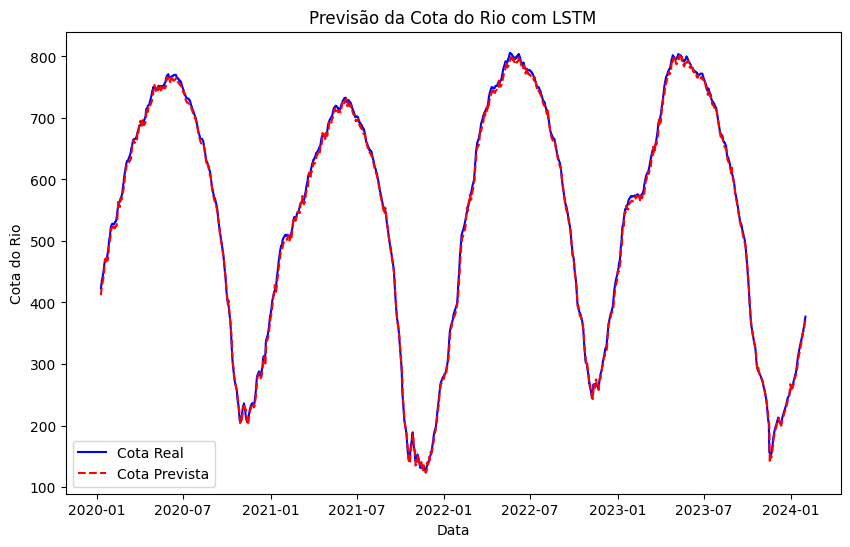

In [ ]:
predicted_cota = model.predict(X_train)

predicted_cota = scaler.inverse_transform(np.concatenate((predicted_cota, np.zeros((predicted_cota.shape[0], 1))), axis=1))[:, 0]
y_test_real = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))), axis=1))[:, 0]

plt.figure(figsize=(10,6))
plt.plot(df['Data'][-len(y_train):], y_test_real, color='blue', label='Cota Real')
plt.plot(df['Data'][-len(predicted_cota):], predicted_cota, color='red', linestyle='--', label='Cota Prevista')
plt.xlabel('Data')
plt.ylabel('Cota do Rio')
plt.title('Previsão da Cota do Rio com LSTM')
plt.legend()
plt.show()
